# The Worst Hitter in MLB History

In [17]:
import pandas as pd
batting = pd.read_csv('data/Batting.csv')

Data courtesy of [Sean Lahman's Baseball](http://www.seanlahman.com/baseball-archive/statistics/)

In [18]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

## Exploring the Batting Dataset

In [19]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [20]:
batting.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [21]:
batting.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
102811,zimmejo02,2016,1,DET,AL,19,4,0,1,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0
102812,zimmery01,2016,1,WAS,NL,115,427,60,93,18,...,46.0,4.0,1.0,29,104.0,1.0,5.0,0.0,6.0,12.0
102813,zobribe01,2016,1,CHN,NL,147,523,94,142,31,...,76.0,6.0,4.0,96,82.0,6.0,4.0,4.0,4.0,17.0
102814,zuninmi01,2016,1,SEA,AL,55,164,16,34,7,...,31.0,0.0,0.0,21,65.0,0.0,6.0,0.0,1.0,0.0
102815,zychto01,2016,1,SEA,AL,12,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Checking out Pete Rose's Career Numbers

In [22]:
batting[batting['playerID'] == 'rosepe01']

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
43287,rosepe01,1963,1,CIN,NL,157,623,101,170,25,...,41.0,13.0,15.0,55,72.0,0.0,5.0,6.0,6.0,8.0
44033,rosepe01,1964,1,CIN,NL,136,516,64,139,13,...,34.0,4.0,10.0,36,51.0,0.0,2.0,3.0,1.0,6.0
44793,rosepe01,1965,1,CIN,NL,162,670,117,209,35,...,81.0,8.0,3.0,69,76.0,2.0,8.0,8.0,2.0,10.0
45567,rosepe01,1966,1,CIN,NL,156,654,97,205,38,...,70.0,4.0,9.0,37,61.0,3.0,1.0,7.0,1.0,12.0
46350,rosepe01,1967,1,CIN,NL,148,585,86,176,32,...,76.0,11.0,6.0,56,66.0,9.0,3.0,1.0,2.0,9.0
47085,rosepe01,1968,1,CIN,NL,149,626,94,210,42,...,49.0,3.0,7.0,56,76.0,15.0,4.0,2.0,4.0,11.0
47978,rosepe01,1969,1,CIN,NL,156,627,120,218,33,...,82.0,7.0,10.0,88,65.0,18.0,5.0,2.0,6.0,13.0
48920,rosepe01,1970,1,CIN,NL,159,649,120,205,37,...,52.0,12.0,7.0,73,64.0,10.0,2.0,0.0,4.0,7.0
49797,rosepe01,1971,1,CIN,NL,160,632,86,192,27,...,44.0,13.0,9.0,68,50.0,15.0,3.0,1.0,3.0,9.0
50693,rosepe01,1972,1,CIN,NL,154,645,107,198,31,...,57.0,10.0,3.0,73,46.0,4.0,7.0,2.0,2.0,7.0


### Adding a `seasons` column

In [23]:
batting['seasons'] = batting['stint'].map(lambda x: x if x == 1 else 0)

### Adding a `year_rect` column

This eliminates multiple copies of the year for when players played with multiple teams in the same season. These two columns together will help when defining the `Era` column below.

In [24]:
def year_correct(row):
    """
    This function replaces multiple copies of the same year
    in a player's record with 0's.
    """
    if row['stint'] != 1:
        return 0
    else:
        return row['yearID']

In [25]:
batting['year_rect'] = batting.apply(year_correct, axis = 1)

In [26]:
batting[batting['playerID'] == 'rosepe01']

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,seasons,year_rect
43287,rosepe01,1963,1,CIN,NL,157,623,101,170,25,...,15.0,55,72.0,0.0,5.0,6.0,6.0,8.0,1,1963
44033,rosepe01,1964,1,CIN,NL,136,516,64,139,13,...,10.0,36,51.0,0.0,2.0,3.0,1.0,6.0,1,1964
44793,rosepe01,1965,1,CIN,NL,162,670,117,209,35,...,3.0,69,76.0,2.0,8.0,8.0,2.0,10.0,1,1965
45567,rosepe01,1966,1,CIN,NL,156,654,97,205,38,...,9.0,37,61.0,3.0,1.0,7.0,1.0,12.0,1,1966
46350,rosepe01,1967,1,CIN,NL,148,585,86,176,32,...,6.0,56,66.0,9.0,3.0,1.0,2.0,9.0,1,1967
47085,rosepe01,1968,1,CIN,NL,149,626,94,210,42,...,7.0,56,76.0,15.0,4.0,2.0,4.0,11.0,1,1968
47978,rosepe01,1969,1,CIN,NL,156,627,120,218,33,...,10.0,88,65.0,18.0,5.0,2.0,6.0,13.0,1,1969
48920,rosepe01,1970,1,CIN,NL,159,649,120,205,37,...,7.0,73,64.0,10.0,2.0,0.0,4.0,7.0,1,1970
49797,rosepe01,1971,1,CIN,NL,160,632,86,192,27,...,9.0,68,50.0,15.0,3.0,1.0,3.0,9.0,1,1971
50693,rosepe01,1972,1,CIN,NL,154,645,107,198,31,...,3.0,73,46.0,4.0,7.0,2.0,2.0,7.0,1,1972


### Grouping By `playerID` and then Summing Will Show Career Totals

In [27]:
players = batting.groupby('playerID').sum()

#### Hank Aaron, for example

In [28]:
players[players.index == 'aaronha01']

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,seasons,year_rect
playerID,,,,,,,,,,,,,,,,,,,,,
aaronha01,45195,23,3298,12364,2174,3771,624,98,755,2297.0,...,73.0,1402,1383.0,293.0,32.0,21.0,121.0,328.0,23,45195


### Adding a Batting Average Column

In [29]:
players['avg'] = players['H'] / players['AB']
players[players.index == 'rosepe01']

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,BB,SO,IBB,HBP,SH,SF,GIDP,seasons,year_rect,avg
playerID,,,,,,,,,,,,,,,,,,,,,
rosepe01,49372,26,3562,14053,2165,4256,746,135,160,1314.0,...,1566,1143.0,167.0,107.0,56.0,79.0,247.0,24,47388,0.302853


### Adding a Slugging Average Column

In [30]:
players['slg'] = (players['H'] + players['2B'] + 2 * players['3B'] + 3 * players['HR']) / players['AB']

In [31]:
players.head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,SO,IBB,HBP,SH,SF,GIDP,seasons,year_rect,avg,slg
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,18084,9,331,4,0,0,0,0,0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,9,18084,0.000000,0.000000
aaronha01,45195,23,3298,12364,2174,3771,624,98,755,2297.0,...,1383.0,293.0,32.0,21.0,121.0,328.0,23,45195,0.304998,0.554513
aaronto01,13768,7,437,944,102,216,42,6,13,94.0,...,145.0,3.0,0.0,9.0,6.0,36.0,7,13768,0.228814,0.327331
aasedo01,25786,13,448,5,0,0,0,0,0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,13,25786,0.000000,0.000000
abadan01,6010,3,15,21,1,2,0,0,0,0.0,...,5.0,0.0,0.0,0.0,0.0,1.0,3,6010,0.095238,0.095238


## Finding the Worst Hitter

Beging by simply sorting according to batting average.

In [32]:
players['avg'].sort_values()

playerID
aardsda01    0.0
fritzch01    0.0
saitota01    0.0
capeljo01    0.0
capelmi01    0.0
            ... 
zimmejo01    NaN
zinkch01     NaN
zinsebi01    NaN
zumayjo01    NaN
zychto01     NaN
Name: avg, Length: 18915, dtype: float64

But this is obviously not good enough. By this measure, any player who played in only a few games but never got a hit is at the top (or bottom) of the list. But let's think like a Bayesian!

### Bringing in Bayes

New plan: Find some average batting average to use as a *prior* probability distribution. Then treat the weight of a player's career as the *evidence* upon which to conditionalize. This will remove the players with very few career appearances from the top of our worst hitters list, since the prior (if we choose it appropriately) will dominate over the new evidence.  Inversely, players with long careers should have their actual numbers dominate over the prior.

Now getting a hit is a binary process (hit or no hit), so we can use the [beta-binomial distribution](https://en.wikipedia.org/wiki/Beta-binomial_distribution), since the beta distribution is a [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior) for a binomial likelihood.

Taking advantage of conjugacy here means that I can simply add a player's career hits and at-bats to the prior's hits and at-bats to get an updated estimate of a player's batting average.

#### Setting the prior

I'm going to use .260 as an average MLB batting average.

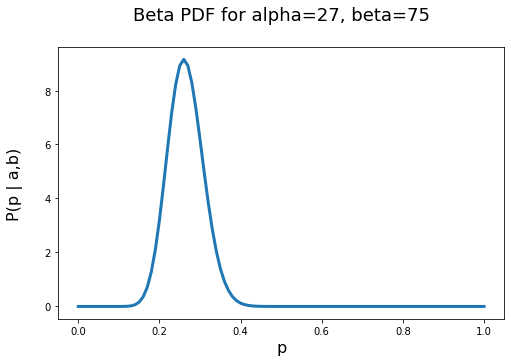

In [33]:
# Prior

successes = 26
failures = 74
alpha_prior = successes + 1
beta_prior = failures + 1

beta_dist = stats.beta(alpha_prior, beta_prior)

fig, ax = plt.subplots(figsize=(8, 5))
pvals = np.linspace(0, 1, 101)
prior = beta_dist.pdf(pvals)

ax.plot(pvals, prior, lw=3)
ax.set_xlabel('p', fontsize=16)
ax.set_ylabel('P(p | a,b)\n', fontsize=16)
ax.set_title(f'Beta PDF for alpha={alpha_prior}, beta={beta_prior}\n',
            fontsize=18)
plt.show()

#### Adding a Maximum A Posteriori Column

In [34]:
# A:

players['MAP'] = (players['H'] + 26) / (players['AB'] + 100)

In [35]:
players.sort_values('MAP', ascending = False).head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,IBB,HBP,SH,SF,GIDP,seasons,year_rect,avg,slg,MAP
playerID,,,,,,,,,,,,,,,,,,,,,
cobbty01,45996,24,3035,11434,2246,4189,724,295,117,1937.0,...,0.0,94.0,295.0,0.0,0.0,24,45996,0.366363,0.511982,0.365441
hornsro01,46231,25,2259,8173,1579,2930,541,169,301,1584.0,...,0.0,48.0,216.0,0.0,3.0,23,44298,0.358497,0.576532,0.357307
barnero01,16878,9,499,2392,698,859,144,44,6,350.0,...,0.0,0.0,0.0,0.0,0.0,9,16878,0.359114,0.463629,0.355136
jacksjo01,26797,15,1332,4981,873,1772,307,168,54,785.0,...,0.0,59.0,131.0,0.0,0.0,13,24882,0.355752,0.517366,0.353867
meyerle01,15002,8,307,1443,306,513,86,31,10,279.0,...,0.0,0.0,0.0,0.0,0.0,8,15002,0.355509,0.478863,0.349320


In [36]:
players = players.reset_index()

#### Adding an `Era` Column

In [37]:
players = players.rename({'MAP': 'MAP_avg'}, axis = 1)

players['Era'] = (players['year_rect'] / players['seasons']).astype(int)

Some players had perfect averages (going 1 for 1 in their careers or the like). Their new `MAP_avg` scores should be close to .260.

In [38]:
players[players['avg'] == max(players['avg'])].head()

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,HBP,SH,SF,GIDP,seasons,year_rect,avg,slg,MAP_avg,Era
31,abramge01,1923,1,3,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1,1923,1.0,1.0,0.267327,1923
705,banisje01,1991,1,1,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1,1991,1.0,1.0,0.267327,1991
867,bartocl01,4009,2,53,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,2,4009,1.0,1.0,0.267327,2004
884,bassdo01,1918,1,2,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,1,1918,1.0,1.0,0.267327,1918
1227,berrijo01,2016,1,14,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1,2016,1.0,1.0,0.267327,2016


#### Experimenting with Different Numbers for the Prior's Hits and At-Bats

In [39]:
def avg_prior(h, ab):
    """
    This function takes in a number of hits and a number of at-bats
    to use as prior values for the Bayesian MAP Method. It returns
    the top (worst) hitter according to the MAP average. The ratio
    of hits to at-bats should be (near) 26:100.
    """
    players['MAP_avg'] = (players['H'] + h) / (players['AB'] + ab)
    return players.sort_values('MAP_avg',
                               #ascending=False
                              ).head(10)['playerID']

The following code will find the worst hitter for prior values of at-bats between 10 and 5000, counting by tens.

In [40]:
worst = []
for i in range(10, 5001, 10):
    worst.append(avg_prior(0.26 * i, i))

For just ten at-bats, the worst hitter is Ron Herbel.

In [41]:
worst[0]

7445     herbero01
2900      chenwe02
17078    thurmmi01
6219     gladdfr01
16795     tatera01
11001    mcculch01
11714    moehlbr01
11193    mcknito01
11199    mclaubo01
16478    straida01
Name: playerID, dtype: object

In [42]:
worst[169]

2151      buhlbo01
1181     bergebi01
5700     frienbo01
2839     chancde01
5112     faberre01
12988    pappami01
16662    suttodo01
9282     koufasa01
6696     grovele01
13322    perryga01
Name: playerID, dtype: object

In [43]:
worst[170]

1181     bergebi01
2151      buhlbo01
5700     frienbo01
2839     chancde01
5112     faberre01
12988    pappami01
16662    suttodo01
9282     koufasa01
6696     grovele01
13322    perryga01
Name: playerID, dtype: object

At precisely 1705 at-bats, the worst hitter switches from Bob Buhl to Bill Bergen.

In [44]:
avg_prior(0.26 * 1704, 1704)

2151      buhlbo01
1181     bergebi01
5700     frienbo01
2839     chancde01
5112     faberre01
12988    pappami01
16662    suttodo01
9282     koufasa01
6696     grovele01
13322    perryga01
Name: playerID, dtype: object

In [45]:
avg_prior(0.26 * 1705, 1705)

1181     bergebi01
2151      buhlbo01
5700     frienbo01
2839     chancde01
5112     faberre01
12988    pappami01
16662    suttodo01
9282     koufasa01
6696     grovele01
13322    perryga01
Name: playerID, dtype: object

In [46]:
worst

[7445     herbero01
 2900      chenwe02
 17078    thurmmi01
 6219     gladdfr01
 16795     tatera01
 11001    mcculch01
 11714    moehlbr01
 11193    mcknito01
 11199    mclaubo01
 16478    straida01
 Name: playerID, dtype: object, 7445     herbero01
 17078    thurmmi01
 11714    moehlbr01
 6189     gilmofr01
 11001    mcculch01
 2839     chancde01
 3053     clarkma01
 2900      chenwe02
 6219     gladdfr01
 2591     carmado01
 Name: playerID, dtype: object, 7445     herbero01
 11714    moehlbr01
 17078    thurmmi01
 2839     chancde01
 6189     gilmofr01
 3053     clarkma01
 2591     carmado01
 14053    redmama01
 17747    walkelu01
 11001    mcculch01
 Name: playerID, dtype: object, 7445     herbero01
 2839     chancde01
 11714    moehlbr01
 17078    thurmmi01
 6189     gilmofr01
 3053     clarkma01
 2591     carmado01
 15562    sheetbe01
 6975     handsbi01
 17747    walkelu01
 Name: playerID, dtype: object, 7445     herbero01
 2839     chancde01
 11714    moehlbr01
 3053     clarkm

In [47]:
players[players['playerID'] == 'herbero01']

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,HBP,SH,SF,GIDP,seasons,year_rect,avg,slg,MAP_avg,Era
7445,herbero01,19673,11,332,206,6,6,2,0,0,...,0.0,11.0,0.0,2.0,9,17703,0.029126,0.038835,0.235113,1967


Ron Herbel: pitcher for the San Francisco Giants, San Diego Padres, New York Mets, and Atlanta Braves.

In [48]:
players[players['playerID'] == 'chancde01']

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,HBP,SH,SF,GIDP,seasons,year_rect,avg,slg,MAP_avg,Era
2839,chancde01,23596,13,406,662,17,44,2,0,0,...,5.0,61.0,1.0,2.0,11,21626,0.066465,0.069486,0.205872,1966


Dean Chance: pitcher for the Los Angeles / California Angels, Minnesota Twins, Cleveland Indians, New York Mets, and Detroit Tigers.

In [49]:
players[players['playerID'] == 'buhlbo01']

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,HBP,SH,SF,GIDP,seasons,year_rect,avg,slg,MAP_avg,Era
2151,buhlbo01,33328,19,457,857,31,76,2,0,0,...,2.0,53.0,2.0,10.0,15,29400,0.088681,0.091015,0.202693,1960


Bob Buhl: pitcher for the Milwaukee Braves, Chicago Cubs, and Philadelphia Phillies.

In [50]:
players[players['playerID'] == 'bergebi01']

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,HBP,SH,SF,GIDP,seasons,year_rect,avg,slg,MAP_avg,Era
1181,bergebi01,20966,11,947,3028,138,516,45,21,2,...,0.0,112.0,0.0,0.0,11,20966,0.17041,0.201123,0.202683,1906


Bill Bergen: Cincinnati Reds and Brooklyn Superbas / Dodgers.

**Aside on the Best Hitters**

To find the *best* hitters, we can re-use our `avg_prior()` function, but simply include an `ascending=False` in the `.sort_values()` call.

In [51]:
best = []
for i in range(10, 5001, 10):
    best.append(avg_prior(0.26 * i, i))

best

[7445     herbero01
 2900      chenwe02
 17078    thurmmi01
 6219     gladdfr01
 16795     tatera01
 11001    mcculch01
 11714    moehlbr01
 11193    mcknito01
 11199    mclaubo01
 16478    straida01
 Name: playerID, dtype: object, 7445     herbero01
 17078    thurmmi01
 11714    moehlbr01
 6189     gilmofr01
 11001    mcculch01
 2839     chancde01
 3053     clarkma01
 2900      chenwe02
 6219     gladdfr01
 2591     carmado01
 Name: playerID, dtype: object, 7445     herbero01
 11714    moehlbr01
 17078    thurmmi01
 2839     chancde01
 6189     gilmofr01
 3053     clarkma01
 2591     carmado01
 14053    redmama01
 17747    walkelu01
 11001    mcculch01
 Name: playerID, dtype: object, 7445     herbero01
 2839     chancde01
 11714    moehlbr01
 17078    thurmmi01
 6189     gilmofr01
 3053     clarkma01
 2591     carmado01
 15562    sheetbe01
 6975     handsbi01
 17747    walkelu01
 Name: playerID, dtype: object, 7445     herbero01
 2839     chancde01
 11714    moehlbr01
 3053     clarkm

For almost all values of at-bats between 10 and 5000 (counting again by tens), the best hitter is Ty Cobb. But there are two names for 10 and 20 at-bats that I don't recognize.

In [ ]:
players[players['playerID'] == 'jansera01']

Ray Jansen: St. Louis Browns.

In [ ]:
players[players['playerID'] == 'sherlvi01']

Vince Sherlock: Brooklyn Dodgers.

In [ ]:
players[players['playerID'] == 'cobbty01']

### Looking for Non-Pitchers

Pitchers are specialized players who are generally given a bit of a break when it comes to hitting, and so really what I'm after is the worst hitter *who was not a pitcher*.

For these next cells I change the function to print out the top ten instead of just the top one.

In [ ]:
avg_prior(26, 100)

Ben Sheets: pitcher for the Milwaukee Brewers, Oakland Athletics, and Atlanta Braves.

Dick Ellsworth: pitcher for the Chicago Cubs, Philadelphia Phillies, Boston Red Sox, Cleveland Indians, and Milwaukee Brewers.

Bill Hands: pitcher for the San Francisco Giants, Chicago Cubs, Minnesota Twins, and Texas Rangers.

Al Leiter: pitcher for the New York Yankees, Toronto Blue Jays, Florida Marlins, and New York Mets.

Sandy Koufax: pitcher for the Brooklyn / Los Angeles Dodgers.

Brian Moehler: pitcher for the Detroit Tigers, Cincinnati Reds, Houston Astros, and Florida Marlins.

Roger Craig: pitcher for the Brooklyn / Los Angeles Dodgers, New York Mets, St. Louis Cardinals, Cincinnati Reds, and Philadelphia Phillies.

In [ ]:
avg_prior(52, 200)

Aaron Harang: pitcher for the Oakland Athletics, Cincinnati Reds, San Diego Padres, Los Angeles Dodgers, Seattle Mariners, New York Mets, Atlanta Braves, and Philadelphia Phillies.

John Burkett: pitcher for the San Francisco Giants, Florida Marlins, Texas Rangers, Atlanta Braves, and Boston Red Sox.

Nolan Ryan: pitcher for the New York Mets, California Angels, Houston Astros, and Texas Rangers.

In [ ]:
avg_prior(78, 300)

Mickey Lolich: pitcher for the Detroit Tigers, New York Mets, and San Diego Padres.

In [ ]:
avg_prior(104, 400)

Bob Friend: pitcher for the Pittsburgh Pirates, New York Yankees, and New York Mets.

Milt Pappas: pitcher for the Baltimore Orioles, Cincinnati Reds, Atlanta Braves, and Chicago Cubs.

In [ ]:
avg_prior(130, 500)

Jerry Koosman: pitcher for the New York Mets, Minnesota Twins, Chicago White Sox, and Philadelphia Phillies.

#### Bringing in pitching data

In [ ]:
pitching = pd.read_csv('data/pitching.csv')

#### Exploring the pitching data

In [ ]:
pitching['playerID'].values

In [ ]:
pitchers = pitching.groupby('playerID').sum()

Somewhat crudely, we'll look for the hitters who have no pitching record whatever.

In [ ]:
pure_bats = [player for player in players['playerID'] if player not in\
             pitching['playerID'].values]

In [ ]:
def also_pitch(x):
    """
    This function will be used to add a column to my
    players DataFrame that will indicate whether the
    player ever pitched.
    """
    if x['playerID'] in pure_bats:
        return 0
    else:
        return 1

In [ ]:
players['no_pitch'] = players.apply(also_pitch, axis = 1)

In [ ]:
pure_batters = players[players['no_pitch'] == 0].copy()

Now we'll just redo our previous MAP Method, but this time applying it only to the pure batters who didn't also pitch.

In [ ]:
def avg_prior_pure(h, ab):
    """
    This function mimics the MAP function from before.
    """
    pure_batters['MAP_avg'] = (pure_batters['H'] + h) / (pure_batters['AB'] + ab)
    return pure_batters.sort_values('MAP_avg',
                               # ascending = False
                              ).head(1)['playerID']

In [ ]:
worst = []
for i in range(10, 5001, 10):
    worst.append(avg_prior_pure(0.26 * i, i))

In [ ]:
worst

These names of pure hitters come up early in the list, but they correspond to very low numbers of at-bats as prior.

Skeeter Shelton: New York Yankees.

Ed Gastfield: Detroit Wolverines and Chicago White Stockings.

Mike Jordan: Pittsburgh Alleghenys.

John Humphries: New York Gothams and Washington Nationals.

It looks like **Bill Bergen** (who came up even before we eliminated the pitchers!) is our winner here. Let's find the exact number of at-bats where Bergen comes to the "top". Given the output from the preceding code, it must be somewhere between 130 and 140 at-bats.

In [ ]:
avg_prior_pure(0.26 * 132, 132)

In [ ]:
avg_prior_pure(0.26 * 133, 133)

***If we set our prior number of at-bats at 133 or more, Bill Bergen will count as the worst hitter in the history of the Major Leagues!***